<a href="https://colab.research.google.com/github/suafle/Clase2/blob/master/checking_cc_diagrams_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord
from astropy import units as u

In [0]:
#Blackbody plot
def BB(wave,Teff):
  #wave must be in A
  c = 2.99792e8 #m s^-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave*1e-10)**5)*(1./(np.exp(h*c/(wave*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  return flambda_BB_SI/1e10 #W m**-2 A**-1

#UBVRI passbands

#wavelength must be between 3000 and 4200 A (U)
#wavelength must be between 3600 and 5600 A (B)
#wavelength must be between 4700 and 7400 A (V)
#wavelength must be between 5500 and 9100 A (R)
#wavelength must be between 7000 and 9200 A (I)

def inter_U(wavelength): 
  U_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/U.txt'
  U = np.loadtxt(U_data)
  Uww = U[:,0] #A
  Ur = U[:,1]
  f = interp1d(Uww,Ur)
  return f(wavelength)
  
def inter_B(wavelength): 
  B_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/B.txt'
  B = np.loadtxt(B_data)
  Bww = B[:,0]
  Br = B[:,1]
  f = interp1d(Bww,Br)
  return f(wavelength)

def inter_V(wavelength): 
  V_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/V.txt'
  V = np.loadtxt(V_data)
  Vww = V[:,0]
  Vr = V[:,1]
  f = interp1d(Vww,Vr)
  return f(wavelength)

def inter_R(wavelength): 
  R_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/R.txt'
  R = np.loadtxt(R_data)
  Rww = R[:,0]
  Rr = R[:,1]
  f = interp1d(Rww,Rr)
  return f(wavelength)

def inter_I(wavelength): 
  I_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/UBVRI/I.txt'
  I = np.loadtxt(I_data)
  Iww = I[:,0]
  Ir = I[:,1]
  f = interp1d(Iww,Ir)
  return f(wavelength)

#2MASS passbands

def inter_j(wavelength): #wavelength must be in A in the range of 10620 and 14500 A
  mass_j = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_J.txt'
  tmass_j = np.loadtxt(mass_j)
  f = interp1d(tmass_j[:,0]*1e4,tmass_j[:,1])
  return f(wavelength)
  
def inter_h(wavelength): #wavelength must be in A in the range of 12890 and 19140 A
  mass_h = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_H.txt'
  tmass_h = np.loadtxt(mass_h)
  f = interp1d(tmass_h[:,0]*1e4,tmass_h[:,1])
  return f(wavelength)
  
def inter_ks(wavelength): #wavelength must be in A in the range of 19000 and 23990 A
  mass_ks = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/2MASS/2MASS_Ks.txt'
  tmass_ks = np.loadtxt(mass_ks)
  f = interp1d(tmass_ks[:,0]*1e4,tmass_ks[:,1])
  return f(wavelength)

#GAIA passbands

def inter_g(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_g = gaia[:,1]
  f = interp1d(gaia_w,gaia_g)
  return f(wavelength)
  
def inter_gbp(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_bp = gaia[:,3]
  f = interp1d(gaia_w,gaia_bp)
  return f(wavelength)
  
def inter_grp(wavelength): 
  gaia_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/GAIADR2/GaiaDR2_RevisedPassbands.dat'
  gaia = np.loadtxt(gaia_data)
  gaia = np.where(gaia==99.99,0,gaia)
  gaia_w = gaia[:,0]*10 #Angstrom
  gaia_rp = gaia[:,5]
  f = interp1d(gaia_w,gaia_rp)
  return f(wavelength)

#WISE passbands

#wavelength must be between 25300 and 65000 A (W1)
#wavelength must be between 25300 and 80000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)
#wavelength must be between 25300 and 285000 A (W1)

def inter_w1(wavelength): 
  wise1_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W1.txt'
  w1 = np.loadtxt(wise1_data)
  w1ww = w1[:,0]*1e4
  w1r = w1[:,1]
  f = interp1d(w1ww,w1r)
  return f(wavelength)
  
def inter_w2(wavelength): 
  wise2_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W2.txt'
  w2 = np.loadtxt(wise2_data)
  w2ww = w2[:,0]*1e4
  w2r = w2[:,1]
  f = interp1d(w2ww,w2r)
  return f(wavelength)

def inter_w3(wavelength): 
  wise3_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W3.txt'
  w3 = np.loadtxt(wise3_data)
  w3ww = w3[:,0]*1e4
  w3r = w3[:,1]
  f = interp1d(w3ww,w3r)
  return f(wavelength)

def inter_w4(wavelength): 
  wise4_data = 'https://raw.githubusercontent.com/suafle/useful_data/master/Passbands/WISE/RSR-W4.txt'
  w4 = np.loadtxt(wise4_data)
  w4ww = w4[:,0]*1e4
  w4r = w4[:,1]
  f = interp1d(w4ww,w4r)
  return f(wavelength)

def mag_ab(Teff,Lbol): 
  Mpc = 3.0856e22 #m
  c = 2.99792e8 #m s^-1
  cA = c*1e10 #A s**-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  pc = 3.0857e16 #m
  Rsun = 695e6 #m
  Lsun = 3.846e26 # W
  sigma_SB = 5.67e-8 #W m^-2 K^-4
  delta_wave = 100 #Å
  wave_vector = np.arange(3000,3e7,delta_wave) #Check the graph above (also in A)
  d = 10 #pc, to account for absolute magnitudes
  
  #Generate black body spectrum in f_lambda units
  #-----------------------------------------
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave_vector*1e-10)**5)*(1./(np.exp(h*c/(wave_vector*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  flambda_BB_SI = flambda_BB_SI/1e7 # erg s**-1 cm**-2 A**-1
  R = np.sqrt(Lbol*Lsun/(4.*np.pi*sigma_SB*Teff**4)) # m Source radius (considering we know Lbol and Teff)
  flux = flambda_BB_SI*(R/(d*pc))**2 #Flux from the source at 10 pc
  
  #AB magnitude
  fgaia = interp1d(wave_vector,flux)
  
  #################
  #UBVRI magnitude#
  #################
  
  #wavelength must be between 3000 and 4200 A (U)
  #wavelength must be between 3600 and 5600 A (B)
  #wavelength must be between 4700 and 7400 A (V)
  #wavelength must be between 5500 and 9100 A (R)
  #wavelength must be between 7000 and 9200 A (I)
  ww = np.arange(3000,4200,0.1)
  f = np.trapz(fgaia(ww) * inter_U(ww) * ww, x=ww) / np.trapz(inter_U(ww) * cA / ww, x=ww)
  u =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(3600,5600,0.1)
  f = np.trapz(fgaia(ww) * inter_B(ww) * ww, x=ww) / np.trapz(inter_B(ww) * cA / ww, x=ww)
  b =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(4700,7400,0.1)
  f = np.trapz(fgaia(ww) * inter_V(ww) * ww, x=ww) / np.trapz(inter_V(ww) * cA / ww, x=ww)
  v =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(5500,9100,0.1)
  f = np.trapz(fgaia(ww) * inter_R(ww) * ww, x=ww) / np.trapz(inter_R(ww) * cA / ww, x=ww)
  r =  -2.5 * np.log10(f) - 48.60
  
  #################
  #2MASS magnitude#
  #################
  
  ww = np.arange(10620,14500,1)
  f = np.trapz(fgaia(ww) * inter_j(ww) * ww, x=ww) / np.trapz(inter_j(ww) * cA / ww, x=ww)
  j =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(12890,19140,1)
  f = np.trapz(fgaia(ww) * inter_h(ww) * ww, x=ww) / np.trapz(inter_h(ww) * cA / ww, x=ww)
  h =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(19000,23990,1)
  f = np.trapz(fgaia(ww) * inter_ks(ww) * ww, x=ww) / np.trapz(inter_ks(ww) * cA / ww, x=ww)
  ks =  -2.5 * np.log10(f) - 48.60
  
  
  ################
  #GAIA magnitude#
  ################
  
  ww = np.arange(3000,11000,1)
  f = np.trapz(fgaia(ww) * inter_g(ww) * ww, x=ww) / np.trapz(inter_g(ww) * cA / ww, x=ww)
  g =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_gbp(ww) * ww, x=ww) / np.trapz(inter_gbp(ww) * cA / ww, x=ww)
  gbp =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_grp(ww) * ww, x=ww) / np.trapz(inter_grp(ww) * cA / ww, x=ww)
  grp =  -2.5 * np.log10(f) - 48.60
  ww = np.arange(7000,9200,0.1)
  f = np.trapz(fgaia(ww) * inter_I(ww) * ww, x=ww) / np.trapz(inter_I(ww) * cA / ww, x=ww)
  i =  -2.5 * np.log10(f) - 48.60
  
  ################
  #WISE magnitude#
  ################
  
  #wavelength must be between 25300 and 65000 A (W1)
  #wavelength must be between 25300 and 80000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  #wavelength must be between 25300 and 285000 A (W1)
  
  ww = np.arange(25300,65000,1)
  f = np.trapz(fgaia(ww) * inter_w1(ww) * ww, x=ww) / np.trapz(inter_w1(ww) * cA / ww, x=ww)
  w1 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,80000,1)
  f = np.trapz(fgaia(ww) * inter_w2(ww) * ww, x=ww) / np.trapz(inter_w2(ww) * cA / ww, x=ww)
  w2 =  -2.5 * np.log10(f) - 48.60
  
  ww = np.arange(25300,285000,1)
  f = np.trapz(fgaia(ww) * inter_w3(ww) * ww, x=ww) / np.trapz(inter_w3(ww) * cA / ww, x=ww)
  w3 =  -2.5 * np.log10(f) - 48.60
  
  f = np.trapz(fgaia(ww) * inter_w4(ww) * ww, x=ww) / np.trapz(inter_w4(ww) * cA / ww, x=ww)
  w4 =  -2.5 * np.log10(f) - 48.60
  
  #U,B,V,R,I,J,H,Ks,G,Gbp,Grp,W1,W2,W3,W4 #15 bands
  #Effective wavelengths in A
  #U = 3571
  #B = 4344
  #V = 5456
  #R = 6442
  #I = 7994
  #J = 12355
  #H = 16458
  #Ks =	21603
  #G = 6730
  #GBP = 5320
  #GRP = 7970
  #W1 = 3.4e4
  #W2 = 4.6e4
  #W3 = 12e4
  #W4 = 22e4
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4


def mag_vega(Teff,Lbol):
  
  #Normal bands
  #mab - mvega = C -> mvega = mab - C  where C is the offset
  u_ab,b_ab,v_ab,r_ab,i_ab,j_ab,h_ab,ks_ab,g_ab,gbp_ab,grp_ab,w1_ab,w2_ab,w3_ab,w4_ab = mag_ab(Teff,Lbol)
  
  u = u_ab - 0.79
  b = b_ab + 0.09
  v = v_ab - 0.02
  r = r_ab - 0.21
  i = i_ab - 0.45
  
  j = j_ab - 0.91
  h = h_ab - 1.39
  ks = ks_ab - 1.85
  
  w1 = w1_ab - 2.699
  w2 = w2_ab - 3.339
  w3 = w3_ab - 5.174
  w4 = w4_ab - 6.620
  
  #Gaia bands
  #Mvega = M_AB - ZP_AB + ZP_veg
  g = g_ab - 25.7915509947 + 25.6914396869
  gbp = gbp_ab - 25.3861560855 + 25.3488107670
  grp = grp_ab - 25.1161664528 +  24.7626744847
  
  return u,b,v,r,i,j,h,ks,g,gbp,grp,w1,w2,w3,w4


In [0]:
#Creating Synthetic Black-Body Main-Sequence Stars
#O6 5e5 38000
#B0 20000 30000
#B5 800 16400
#A0 80 10800
#A5 20 8620
#F0 6 7240
#F5 2.5 6540
#G0 1.26 5920
#G2 1 5780
#G5 0.79 5610
#K0 0.40 5240
#K5 0.16 4410
#M0 0.072 3800
#M5 0.0079 3120
#M8 0.0008 2660
mag_o6 = mag_vega(38000,5e5)
mag_b0 = mag_vega(30000,2e4)
mag_b5 = mag_vega(16400,800)
mag_a0 = mag_vega(10800,80)
mag_a5 = mag_vega(8620,20)
mag_f0 = mag_vega(7240,6)
mag_f5 = mag_vega(6540,2.5)
mag_g0 = mag_vega(5920,1.26)
mag_g2 = mag_vega(5780,1)
mag_g5 = mag_vega(5610,0.79)
mag_k0 = mag_vega(5240,0.40)
mag_k5 = mag_vega(4410,0.16)
mag_m0 = mag_vega(3800,0.072)
mag_m5 = mag_vega(3120,0.0079)
mag_m8 = mag_vega(2660,0.0008)

In [0]:
mags = [mag_o6, \
  mag_b0, \
  mag_b5, \
  mag_a0, \
  mag_a5, \
  mag_f0, \
  mag_f5, \
  mag_g0, \
  mag_g2, \
  mag_g5, \
  mag_k0, \
  mag_k5, \
  mag_m0, \
  mag_m5, \
  mag_m8]
  
U = []
B = []
V = []
R = []
I = []
J = []
H = []
Ks = []
G = []
Gbp = []
Grp = []
W1 = []
W2 = []
W3 = []
W4 = []

for i in range(len(mags)):
  U.append(mags[i][0])
  B.append(mags[i][1])
  V.append(mags[i][2])
  R.append(mags[i][3])
  I.append(mags[i][4])
  J.append(mags[i][5])
  H.append(mags[i][6])
  Ks.append(mags[i][7])
  G.append(mags[i][8])
  Gbp.append(mags[i][9])
  Grp.append(mags[i][10])
  W1.append(mags[i][11])
  W2.append(mags[i][12])
  W3.append(mags[i][13])
  W4.append(mags[i][14])

U = np.array(U)
B = np.array(B)
V = np.array(V)
R = np.array(R)
I = np.array(I)
J = np.array(J)
H = np.array(H)
Ks = np.array(Ks)
G = np.array(G)
Gbp = np.array(Gbp)
Grp = np.array(Grp)
W1 = np.array(W1)
W2 = np.array(W2)
W3 = np.array(W3)
W4 = np.array(W4)

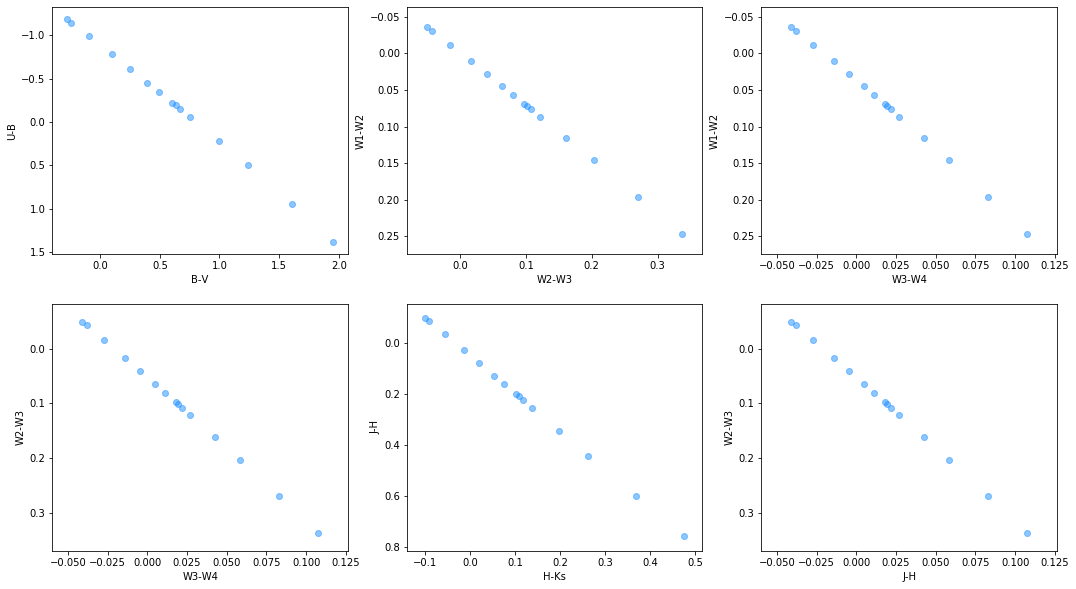

In [5]:
fig, ax = plt.subplots(figsize = (18,10), ncols = 3, nrows = 2)

matplotlib.rcParams.update({'font.size': 12})

ax[0][0].scatter(B-V,U-B,alpha=0.5,c='dodgerblue',label='BB')
ax[0][0].invert_yaxis()
ax[0][0].set_xlabel('B-V')
ax[0][0].set_ylabel('U-B')
#ax[0][0].legend()

ax[0][1].scatter(W2-W3,W1-W2,alpha=0.5,c='dodgerblue',label='BB')
ax[0][1].invert_yaxis()
ax[0][1].set_xlabel('W2-W3')
ax[0][1].set_ylabel('W1-W2')

ax[0][2].scatter(W3-W4,W1-W2,alpha=0.5,c='dodgerblue',label='BB')
ax[0][2].invert_yaxis()
ax[0][2].set_xlabel('W3-W4')
ax[0][2].set_ylabel('W1-W2')

ax[1][0].scatter(W3-W4,W2-W3,alpha=0.5,c='dodgerblue',label='BB')
ax[1][0].invert_yaxis()
ax[1][0].set_xlabel('W3-W4')
ax[1][0].set_ylabel('W2-W3')

ax[1][1].scatter(H-Ks,J-H,alpha=0.5,c='dodgerblue',label='BB')
ax[1][1].invert_yaxis()
ax[1][1].set_xlabel('H-Ks')
ax[1][1].set_ylabel('J-H')

ax[1][2].scatter(W3-W4,W2-W3,alpha=0.5,c='dodgerblue',label='BB')
ax[1][2].invert_yaxis()
ax[1][2].set_xlabel('J-H')
ax[1][2].set_ylabel('W2-W3')

plt.show()
plt.close()